# MSDM5056 Tutorial 6 - Network Models I

## Contents

1. Regular Lattices
2. Random Networks
3. Configuration Model

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We are often interested in three properties of a network:

1. degree distribution $P(k)$ (and its moments including $\langle{k}\rangle$ and $\langle{k^2}\rangle$),
2. average clustering coefficient $C$, and
3. average shortest path length $L$.

This is because a real network tends to possess a scale-free $P(k)$, a high $C$, and a short $L$ (the small-world property), so a realistic network model should produce networks with these properties.

---

# 1. Regular Lattices

A $K$-regular network is characterized by three parameters: 

- A constant node degree $K$, so that $P(k)=\delta{\left(k-K\right)}$. 
- Number of nodes $N$ 
- Dimension $d$, i.e. the lowest dimension of the space in which you can embed the network. Particularly, a two-dimensional network can be drawn as a planar graph.

A regular lattice is simultaneously a regular network and a lattice and often referred to as a "grid". It is however lattices are something more complicated. Informally, a lattice is a self-similar graph, whose nodes sit according to a repeating arrangement. (In the language of material science, if a lattice has an $n$-node unit cell, the $n$ nodes' coordinate vectors $\mathbf{v}$, i.e. primitive vectors, form a basis of $\mathbb{R}^n$ so that the lattice covers $\big\{ {\sum_{i=1}^n {a_i\mathbf{v}_i}} \mid {a_i\in\mathbb{Z}}\big\}$.) 

A lattice's edges only connect nodes "close" to each other, where "closeness" is defined with some metric. The code below illustrates this idea with Euclidean distance although the resultant networks are not lattices for their random node arrangements.

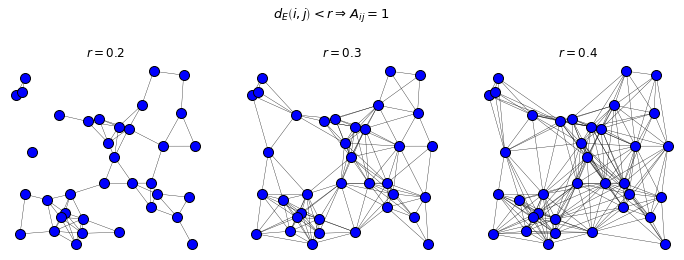

In [2]:
N = 36
np.random.seed(5056)
demo = nx.Graph(pos=np.random.random((N,2))) # 0 <= x, y < 1
demo.add_nodes_from([(i, {'c':demo.graph['pos'][i]}) for i in range(N)])
dE = lambda i,j: np.sum((demo.graph['pos'][i]-demo.graph['pos'][j])**2)**.5

fig,ax = plt.subplots(1,3, figsize=(12,3.5))
fig.suptitle(r'$d_E\left({i,j}\right)<r\Rightarrow\,A_{ij}=1$', y=1.1, fontsize=13)
for r,col in zip([.2,.3,.4], ax):
    [demo.add_edge(i,j) for i in range(N) for j in range(i) if dE(i,j)<r]
    col.set_title('$r=%.3g$' % r)
    nx.draw(demo, pos=demo.graph['pos'], ax=col,
            node_size=100, node_color='b', width=.33, edgecolors='k')
demo.remove_edges_from(list(demo.edges))

## 1.1 Complete networks

A complete network is an ($N-1$)-regular $N$-node network. It is the densest among all networks with the same size. It is perfectly clustered, i.e. $C=1$ because all nodes are neighbours of each other; for the same reason, $L=1$. It is at the smae time an ($N-1$)-dimensional regular lattice. You can construct it with `complete_graph()`.

In [3]:
complete = nx.complete_graph(10)
k = np.mean([k for n,k in complete.degree])
C = nx.average_clustering(complete)
L = nx.average_shortest_path_length(complete)
print('A %d-node complete graph has <k> = %.3g, C = %.3g, and L = %.3g.'
     %(complete.number_of_nodes(),k,C,L))

A 10-node complete graph has <k> = 9, C = 1, and L = 1.


## 1.2 Regular tilings

Squares, triangles, and hexagons are special as they are the only regular polygons that tessellate on a plane. Mathematicians sometimes call them regular tilings. We may construct regular lattices with them: 

- A square tiling leads to a $4$-regular lattice; 
- A triangular tiling leads to a $6$-regular lattice, 
- A hexagonal tiling leads to a $3$-regular lattice.

NetworkX provides generators of these regular lattices, `grid_2d_graph()` for square lattices, `triangular_lattice_graph()` for triangular lattices, and `hexagonal_lattice_graph()` for hexagonal lattices.

A 4x4 periodic square lattice has 16 nodes, <k> = 4, C = 0, and L = 2.13.


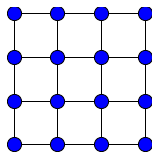

In [4]:
row, col = 4, 4 # 4 nodes per side
square = nx.grid_2d_graph(row, col, periodic=True)
plt.figure(figsize=(2,2))
nx.draw(square, dict((n,n) for n in square),
        node_size=200, node_color='b', edgecolors='k')

k = np.mean([k for n,k in square.degree])
C = nx.average_clustering(square)
L = nx.average_shortest_path_length(square)
print('A %dx%d periodic square lattice has %d nodes, <k> = %.3g, C = %.3g, and L = %.3g.'
     %(row,col,square.number_of_nodes(),k,C,L))

Note that the parameters of `triangular_lattice_graph()` and `hexagonal_lattice_graph()` are quite different from that of `grid_2d_graph()`. The red lines on the following graphs encircle a regular lattice's unit cell.

A 4x6 periodic triangular lattice has 12 nodes, <k> = 6, C = 0.467, and L = 1.45.


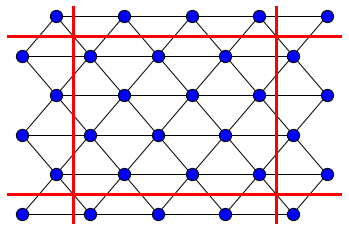

In [5]:
row, col = 4, 6 # 4 rows and 6 cols of triangles
                # erroneous if odd rows/cols and periodic
triangle = nx.triangular_lattice_graph(row, col, periodic=True)
k = np.mean([k for n,k in triangle.degree])
C = nx.average_clustering(triangle)
L = nx.average_shortest_path_length(triangle)
print('A %dx%d periodic triangular lattice has %d nodes, <k> = %.3g, C = %.3g, and L = %.3g.'
     %(row,col,triangle.number_of_nodes(),k,C,L))

triVisual = nx.triangular_lattice_graph(row+1, col+2, periodic=False)
plt.axvline(.75, c='r', ls='-', lw=3)
plt.axvline((col+1.5)/2, c='r', ls='-', lw=3)
plt.axhline(3**.5/4, c='r', ls='-', lw=3)
plt.axhline(3**.5/2*(row+.5), c='r', ls='-', lw=3)
nx.draw(triVisual, dict((n,p) for n,p in triVisual.nodes(data='pos')),
        node_size=150, node_color='b', edgecolors='k')

A 2x4 periodic hexagonal lattice has 16 nodes, <k> = 3, C = 0, and L = 2.4.


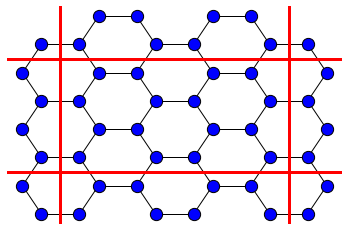

In [6]:
row, col = 2,4 # 2 rows and 4 cols of hexagons
               # erroneous if odd rows/cols and periodic
hexagon = nx.hexagonal_lattice_graph(row, col, periodic=True)
k = np.mean([k for n,k in hexagon.degree])
C = nx.average_clustering(hexagon)
L = nx.average_shortest_path_length(hexagon)
print('A %dx%d periodic hexagonal lattice has %d nodes, <k> = %.3g, C = %.3g, and L = %.3g.'
     %(row,col,hexagon.number_of_nodes(),k,C,L))

hexVisual = nx.hexagonal_lattice_graph(row+1, col+1, periodic=False)
plt.axvline(1, c='r', ls='-', lw=3)
plt.axvline(7, c='r', ls='-', lw=3)
plt.axhline(3**.5/2*1.5, c='r', ls='-', lw=3)
plt.axhline(3**.5/2*5.5, c='r', ls='-', lw=3)
nx.draw(hexVisual, pos=dict((n,p) for n,p in hexVisual.nodes(data='pos')),
        node_size=150, node_color='b', edgecolors='k')

## 1.3 Rings

A ring is a $2$-regular $1$-dimensional lattice, which you can construct with `cycle_graph()`. Its dimension grows if we additionally connect each node to its ($K-2$) nearest neighbours. The resultant network is thus $K$-regular and becomes complete if $K=N-1$. While it does not have a proper name, we may call it a $K$-regular ring. You can create a Watts-Strogatz ring with `watts_strogatz_graph()` by setting $p=0$. (You will learn more about Watts and Strogatz in lecture 7.)

As $K$ grows but stays below $\dfrac{2N}{3}$, $C=\dfrac{3\left(K-2\right)}{4\left(K-1\right)}$ approaches $\dfrac{3}{4}$; similarly, $L$ follows $\dfrac{N}{2K}\sim N$ as long as $K\ll N$. Therefore, a $K$-regular ring is highly clustered with a wide separation between nodes.

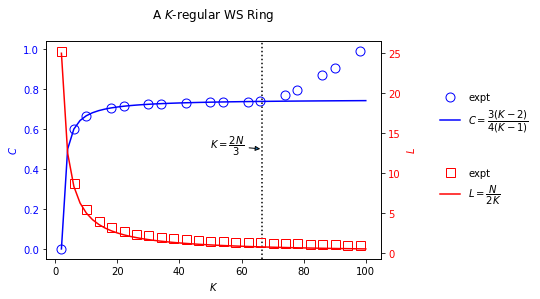

In [7]:
N = 100
ring = lambda K: nx.watts_strogatz_graph(N, K, 0)
Ks = range(2, N, 4)
Cs = [nx.average_clustering(ring(K)) for K in Ks]
Ls = [nx.floyd_warshall_numpy(ring(K)).sum()/(N*(N-1)) for K in Ks]

KsCont = np.linspace(2, N)
plt.plot(Ks, Cs, 'bo', mfc='none', ms=9, markevery=.05, label='expt')
plt.plot(KsCont, 3*(KsCont-2)/(4*(KsCont-1)), 'b-', label='$C=\dfrac{3(K-2)}{4(K-1)}$')
plt.axvline(2*N/3, c='k', ls=':')
plt.annotate('$K=\dfrac{2N}{3}$', (2*N/3,.5), (N/2,.5), arrowprops={'arrowstyle': '-|>'})
plt.legend(loc='center left', bbox_to_anchor=(1.15,.67), frameon=False)
plt.xlabel('$K$')
plt.ylabel('$C$', color='b')
plt.tick_params(axis='y', labelcolor='b')

plt.gca().twinx().plot(Ks, Ls, 'rs', mfc='none', ms=9, label='expt')
plt.plot(KsCont, N/2/KsCont, 'r', label=r'$L=\dfrac{N}{2K}$')
plt.legend(loc='center left', bbox_to_anchor=(1.15,.33), frameon=False)
plt.ylabel('$L$', color='r')
plt.tick_params(axis='y', labelcolor='r')
plt.title('A $K$-regular WS Ring\n')
plt.show()

## 1.4 Hypercubic lattices

If you duplicate a $2$-node line and connect each node to its counterpart, you get a $4$-node square. If you duplicate the square and connect each node to its counterpart, you get a $8$-node cube. A hypercube generalizes this idea: you get a ($d+1$)-dimensional hypercube by joining two $d$-dimensional hypercubes, which have $2^d$ vertices each. A line, a square, and a cube are respectively $1$-, $2$-, $3$-dimensional hypercubes. You can construct a hypercube with `hypercube_graph()`.

A hypercubic lattice is a lattice whose unit cell is a hypercube, so a ring, a square lattice, and a cubic lattice are respectively $1$-, $2$-, and $3$-dimensional hypercubic lattices. More generally, the unit cell of a hypercubic lattice is allowed to be a hyperrectangle, which has different lengths on each side. You can create such a hyperrectangular lattice with `grid_graph()`.

A $d$-dimensional periodic hypercubic lattice is $2^d$-regular and generally possesses $L\sim N^{1/d}$. Hence a high dimension reduces a hypercubic lattice's $L$.

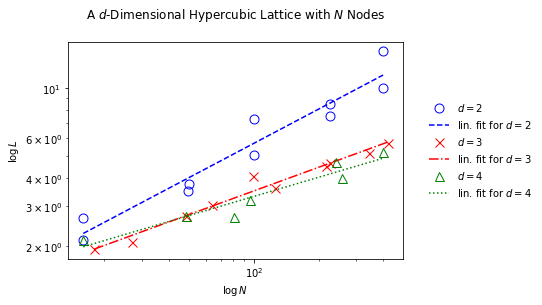

In [8]:
samples_fixd = {2: [[2,8], [5,10], [4,25], [9,25], [8,50]]+
                   [[l]*2 for l in [4,7,10,15,20]],
                3: [[2,3,3], [3,4,4], [3,3,11], [5,5,9], [6,7,10]]+
                   [[l]*3 for l in [3,4,5,6,7]],
                4: [[2,2,3,4], [2,3,4,4], [2,3,4,10], [2,4,5,10]]+
                   [[l]*4 for l in [2,3,4]]}
Ls_fixd, Ns_fixd = {}, {}

for d in samples_fixd:
    Ls_fixd[d], Ns_fixd[d] = [], []
    for config in samples_fixd[d]:
        hypercube = nx.grid_graph(config, True)
        N = hypercube.number_of_nodes()
        Ls_fixd[d].append(nx.floyd_warshall_numpy(hypercube).sum()/(N*(N-1)))
        Ns_fixd[d].append(N)
    
    Ns, Ls = Ns_fixd[d], Ls_fixd[d]
    plt.loglog(Ns, Ls, ['bo','rx','g^'][d-2], mfc='none', ms=9, label='$d=%d$'%d)
    m,c = np.polyfit(np.log(Ns), np.log(Ls), 1)
    Ns = np.array(sorted(list(set(Ns))))
    plt.plot(Ns, np.exp(c)*Ns**m, ['b--','r-.','g:'][d-2], label='lin. fit for $d=%d$'%d)
    
plt.legend(loc='center left', bbox_to_anchor=(1.05,.5), frameon=False)
plt.xlabel('$\log{\,N}$')
plt.ylabel('$\log{\,L}$')
plt.title('A $d$-Dimensional Hypercubic Lattice with $N$ Nodes\n')
plt.show()

---
# 2. Random Networks

A random network may be defined in terms of its number of edges or connection probability, which Erdős and Rényi and Gilbert respectively proposed [1,2].

- In the Erdős-Rényi model, a random network $G$ contains $N$ nodes, and $E$ out of the $E_0=\left(\matrix{N\\2}\right)$ possible edges are realized.
- In the Gilbert model, a random network $G$ contains $N$ nodes, and each possible edge is present with a probability $p$. This is alternatively called the binomial model.

The two models are statistically similar but distinct. While an ER network definitely has $E$ edges, the number of edges of a Gilbert network fluctuates around $\langle{E}\rangle=pE_0$. The probability that a Gilbert network has exactly $E$ edges reads

\begin{align*}
    P_E = \left(\matrix{E_0\\E}\right) p^E \left(1-p\right)^{E_0-E}\,.
\end{align*}

Anyhow, we commonly pay tribute only to Erdős and Rényi today but sticking to Gilbert's approach. In NetworkX, 

- `erdos_renyi_graph()` and `gnp_random_graph()` refer to the Gilbert model
- `gnm_random_graph()` refers to the original Erdős-Rényi model.

In addition, `fast_gnp_random_graph()` costs a running time of $\mathcal{O}\left(N+E\right)$, so it is considerably faster than `erdos_renyi_graph()`, which takes $\mathcal{O}\left(N^2\right)$, if you only need a sparse network, i.e. $E\ll E_0$.

In [9]:
er_func = nx.erdos_renyi_graph     # O(N^2)
er_fast = nx.fast_gnp_random_graph # O(N+E)

## 2.1 The Erdős-Rényi model

### 2.1.1. Degree distribution

While the degree distribution of the ER network is dependent on $p$ only. The degree of a node is $k$ if and only if $k$ of its edges are presence and $N-1-k$ of its edges are absent. Given the probability of the presence of an edge as $p$, the probability of finding a node with degree $k$ is  

\begin{align*}
    P_N(k) = \left(\matrix{N-1\\k}\right) p^k \left(1-p\right)^{N-1-k}\,.
\end{align*}

Such distribution is also known as the binomial distribution $B(N-1,p)$. Its first moment, the average degree $\langle k \rangle$ can be easily evaluated as

\begin{align*}
    E[k] &= \sum_k kP(k) \\
    &= \sum_{k=0} k \cdot \frac{(N-1)!}{(N-1-k)!k!} \cdot p^k \left(1-p\right)^{N-1-k}\ \\
    &= (N-1)p \cdot \sum_{k=1} \frac{(N-2)!}{(N-1-k)!(k-1)!} \cdot p^{k-1} \left(1-p\right)^{N-1-k}\ \\
    &= (N-1)p \cdot \sum_{k=1} P_{N-2}(k-1) \\
    &= (N-1)p\ .
\end{align*}

We have make use of the normalization $\sum P(k) = 1$ in the last line. While its second moment can be calculated using the binomial identities 

\begin{align*}
\left(\matrix{n-1\\k-1}\right) = \left(\matrix{n\\k}\right) - \left(\matrix{n-1\\k}\right)
\end{align*}
\begin{align*}
    E[k^2] &= \sum_k k^2 P(k) \\
    &= (N-1) \sum_{k=1} k \frac{(N-2)!}{(N-1-k)!(k-1)!} p^k \left(1-p\right)^{N-1-k}\\
    &= (N-1) \sum_{k=1} k \cdot \left[ \frac{(N-1)!}{(N-1-k)!k!} - \frac{(N-2)!}{(N-2-k)!k!} \right]
    p^k\left(1-p\right)^{N-1-k}\ \\
    &= (N-1)^2p^2 + (N-1)p(1-p)
\end{align*}

Usually we characterize a random network by a its average degree $E[k] = \langle k \rangle = (N-1)p = \text{const.}$. In the case when $N$ is very large (i.e. $p$ very small), the binomial distribution is limiting to the Poisson distribution for $k \ll N$. Do the Taylor expansion to the first and third term in $P_{N-1}(k)$: 

\begin{align*}
    \frac{(N-1)!}{(N-1-k)!k!} &\approx \dfrac{\left(N-1\right)^k}{k!} \\
\end{align*}

and 

\begin{align*}
    \ln{\big[\left(1-p\right)^{N-1-k}\big]}
    &= \left(N-1-k\right)\ln{\left(1-\dfrac{\langle{k}\rangle}{N-1}\right)} \\
    &\approx -\left(N-1-k\right)\dfrac{\langle{k}\rangle}{N-1} \\
    &= -\langle{k}\rangle\left(1-\dfrac{k}{N-1}\right) \\
    &\approx -\langle{k}\rangle \\
    \left(1-p\right)^{N-1-k} &= e^{-\langle{k}\rangle}
\end{align*} 

We get

\begin{align*}
    P_{N-1}(k) \approx 
   \dfrac{\left(N-1\right)^k}{k!} p^k e^{-\langle{k}\rangle} =
    \dfrac{\langle{k}\rangle^k}{k!} e^{-\langle{k}\rangle} = \text{Pois}(k, \langle k\rangle) \,,
\end{align*}

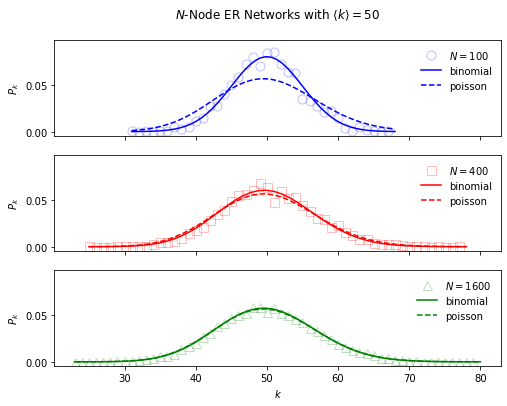

In [10]:
from scipy.special import comb,factorial

trials = 10
kAvg = 50

fig,ax = plt.subplots(3,1,sharex=True,sharey=True,figsize=(8,6))
for i,(a,N) in enumerate(zip(ax,[100,400,1600])):
    degs = [k for t in range(trials) for n,k in er_fast(N,kAvg/(N-1),5056+t).degree]
    kMin,kMax = min(degs),max(degs)
    a.plot(range(kMin,kMax+1),(np.bincount(degs)/(N*trials))[kMin:kMax+1],
           ['bo','rs','g^'][i], ms=9, mfc='none', alpha=.25, label='$N=%d$'%N)
    
    ks,p = np.linspace(kMin,kMax+1),kAvg/(N-1)
    a.plot(ks, comb(N-1,ks)*p**ks*(1-p)**(N-1-ks), ['b','r','g'][i], label='binomial')
    a.plot(ks, kAvg**ks/factorial(ks)*np.exp(-kAvg), ['b','r','g'][i], ls='--', label='poisson')
    a.set_ylabel('$P_k$')
    a.legend(loc=1, frameon=False)

ax[-1].set_xlabel('$k$')
ax[0].set_ylim(a.get_ylim()[0],a.get_ylim()[1]*1.1)
ax[0].set_title(r'$N$-Node ER Networks with $\langle{k}\rangle=%d$'%(kAvg)+'\n')
plt.show()

The Poisson distribution has a very nice property in its first and second moment. (Leave to you as an exercise)

\begin{align*}
     E[k] = \sum_k k \text{Pois}(k, \langle k\rangle) &= \langle k\rangle \\
     E[k^2] = \sum_k k^2 \text{Pois}(k, \langle k\rangle) &= \langle k\rangle^2 + \langle k\rangle
\end{align*}

Here tabulates the approximation error of mean and variance between the binomial distribution and Poisson distribution when $N\rightarrow \infty$.

In [11]:
trials = 10
kAvg = 50
print('%5s%10s%10s%10s' % ('N','E(k)','Var(k)','theory'))
print('='*35)
for N in [100,400,1600]:
    p = kAvg/(N-1)
    eBar = np.mean([np.mean([k for n,k in er_fast(N,p,5056+t).degree]) for t in range(trials)])
    vBar = np.mean([np.var([k for n,k in er_fast(N,p,5056+t).degree]) for t in range(trials)])
    print('%5d%10.3g%10.3g%10.3g' % (N, eBar, vBar, p*(1-p)*(N-1)))
print('%5s%30d' % ('inf',kAvg))

    N      E(k)    Var(k)    theory
  100      49.9      24.6      24.7
  400      50.1      42.6      43.7
 1600        50      49.3      48.4
  inf                            50


### 2.1.2. Range of degree

We can estimate the expected maximum degree $k_\text{max}$ and the expected minimum degree $k_\text{min}$ of a given configuration $\left(N,p\right)$. There should be on average no more than one node with $k$ above $k_\text{max}$ or below $k_\text{min}$. Mathematically, this statement is translated to two formulae:

\begin{align*}
    \begin{cases}
        1-F(k_\text{max}) \leq \dfrac{1}{N}  \\
        F(k_\text{min}-1) \leq \dfrac{1}{N} 
    \end{cases}\,,
\end{align*}

where $F\left(k^*\right)=\sum_{k=0}^{k^*}{P(k)}$ is the cumulative frequency of $P(k)$. If $P(k)$ is Poisson,

\begin{align*}
       F\left(k^* \right)
    &= e^{−\langle{k}\rangle}\sum_{k=0}^{k^* }{\dfrac{\langle{k}\rangle^k}{k!}} \\
    &= 1- e^{−\langle{k}\rangle} \sum_{k=k^* +1}^\infty {\dfrac{\langle{k}\rangle^k}{k!}} \\
    &\approx 1- e^{−\langle{k}\rangle} \dfrac{\langle{k}\rangle^{k^* +1}}{\left(k^* +1\right)!}\,,
\end{align*}

- When $k^*$ is small we can directly compute $F(k^*)$
- When $k^*$ is large we can use the above approximation, where terms with $k>k^* +1$ in the last step naturally vanish when $k^*$ is large enough. 

One can then substitute the approximated $F$ back to the inequalities and numerically solve the range of degree. After all, both binomial distribution and Poisson distriubtion are bell-shaped, so an ER network lacks nodes with extreme degrees. Therefore if our social network were random, there would never be any celebrities in this world.

### 2.1.3. Clustering coefficient

A node's clustering coefficient measures how likely its neighbours are connected. On an ER network, the probability is homogeneously $p$, so all nodes are expected to have a clustering coeffcient $c=p$, so does the network itself, i.e. $C=p=\dfrac{\langle{k}\rangle}{N-1}$. This means that $C$ drops with the network's size if $\langle{k}\rangle$ is fixed.

In [12]:
trials = 10
kAvg = 50
print('%5s%10s%10s' % ('N','C','theory'))
print('='*25)
for N in [100,400,1600]:
    p = kAvg/(N-1)
    cBar = np.mean([nx.average_clustering(er_fast(N,p,5056+t)) for t in range(trials)])
    print('%5d%10.3g%10.3g' % (N, cBar, p))

    N         C    theory
  100     0.505     0.505
  400     0.125     0.125
 1600    0.0313    0.0313


### 2.1.4. Shortest path length

An ER network has an incredibly short average shortest path length $L\approx\dfrac{\ln{N}}{\ln{\langle{k}\rangle}}$, which defines the notion "small world". Quite against the intuition learnt from hypercubic lattices, $L$ increases logarithmically with $N$ instead of exponentially, so it remains short even if $N$ is enormous. Suppose that our world is a random network with $7\times10^9$ nodes. If we all have $50$ friends, then the average interpersonal distance is around $6$ despite our world's enormous size. (And this explains the famous "six degrees of separation".)

Meanwhile, $L$ trivially drops $\langle{k}\rangle$ rises.

In [13]:
trials = 10
kAvg = 50
print('%5s%10s%10s' % ('N','L','theory'))
print('='*25)
for N in [100,225,400]:
    p = kAvg/(N-1)
    lBar = np.mean([nx.floyd_warshall_numpy(er_fast(N,p,5056+t)).sum()/(N*(N-1))
                    for t in range(trials)])
    print('%5d%10.3g%10.3g' % (N, lBar, np.log(N)/np.log(kAvg)))

    N         L    theory
  100       1.5      1.18
  225      1.78      1.38
  400      1.88      1.53


## 2.2 Percolation theory

When we are given a configuration $\left(N,p\right)$, we naturally ask how connected the resultant ER network is. This question turns out to be closely related to percolation theory, which studies how substances spread through a medium. For example, a sponge with water may be modelled as an ER network: each hole in the sponge is a node, and two nodes are connected if they both contain water droplets. If we know that a hole absorbs water from an adjacent hole or the external environment with a probability $p$, how wet do we expect the sponge to become eventually?

### 2.2.1. Giant component

A giant component $g$ is a component whose size is comparable to the whole network. Practically, we may consider a network's uniquely largest component as the giant component if its size breaks above a certain threshold. If a giant component exists, all nodes either belong to or not belong to the giant component. Denote 

- the number of nodes inside the giant component as $N_g$
- the giant component's fractional size as $S=\dfrac{N_g}{N}$. 
- the fraction of nodes that are not in the giant component is $u=1-S$. 

If a node $i$ is outside the giant component, either statement below is true for it and another node $j$.

1. $i$ is not connected with $j$. This happens with a probability $1-p$.
2. $i$ is connected with $j$, but $j$ is also outside the giant component. This happens with a probability $pu$.

Since there are ($N-1$) choices of $j$, the total probability that $i$ is outside the giant component reads $\left(1-p+pu\right)^{N-1}$. Meanwhile, as we have defined $u$ to be the fraction of nodes outside the giant component,

\begin{align*}
      u &= \left(1-p+pu\right)^{N-1} \\
 \ln{u} &= \left(N-1\right) \ln{\big[1-p\left(1-u\right)\big]} \\
          &= \left(N-1\right) \ln{\bigg[1-\dfrac{\langle{k}\rangle}{N-1}\left(1-u\right)\bigg]} \\
          &\approx -\left(N-1\right) \dfrac{\langle{k}\rangle}{N-1}\left(1-u\right) \\
          &= -\langle{k}\rangle\left(1-u\right) \\
      u &= e^{-\langle{k}\rangle\left(1-u\right)} \\ \therefore
      S &= 1-e^{-\langle{k}\rangle S}\,.
\end{align*}

The giant copmonent's size thus depends on $\langle{k}\rangle$. If $0\leq\langle{k}\rangle<1$, only the trivial solution $S=0$ exists for the transcendental equation, but a non-trivial solution emerges once $\langle{k}\rangle>1$. Hence $\langle{k}\rangle=1$ marks the phase transition from the absence to the presence of a giant component. In terms of sponge and water, we expect to see a mostly wet sponge becomes wet once $p$ exceeds $\dfrac{1}{N}$.

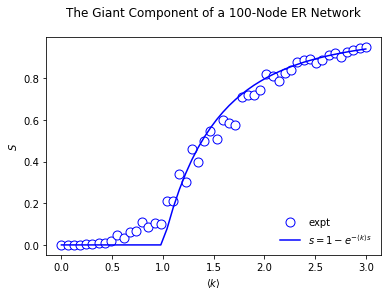

In [14]:
N = 100
trials = 10
ks = np.linspace(0,3)
Ngs = np.zeros((trials,len(ks)), int)
threshold = 0.0 # higher => a stricter defintion of giant component

for i,k in enumerate(ks):
    for t in range(trials):
        for c in nx.connected_components(er_fast(N, k/(N-1), 5056+t*trials+i)):
            if len(c) > threshold*N:
                if len(c) > Ngs[t,i]: Ngs[t,i] = len(c)
                elif len(c) == Ngs[t,i]: # regard the largest component
                    Ngs[t,i] = 0         # as a giant component
                    break                # only if its size is unique
Ss_expt = Ngs.mean(0)/N
                
def solve_S_with(k):
    Ss = np.linspace(0,1)
    argmin = np.argmin(np.abs(1-np.exp(-k*Ss)-Ss)[1:])+1
    Ss = np.linspace(Ss[argmin-1],Ss[argmin+1],100)
    return Ss[np.argmin(np.abs(1-np.exp(-k*Ss)-Ss))]
Ss_theory = np.array([solve_S_with(k) for k in ks])

plt.plot(ks, Ss_expt, 'bo', mfc='w', ms=9, label='expt')
plt.plot(ks, Ss_theory, 'b-', label=r'$s=1-e^{-\langle{k}\rangle s}$')
plt.title('The Giant Component of a %d-Node ER Network\n' % N)
plt.legend(loc=4, frameon=False)
plt.xlabel(r'$\langle{k}\rangle$')
plt.ylabel('$S$')
plt.show()

### 2.2.2. Connectedness

Now we know that $\langle{k}\rangle>1$ implies the existence of a giant component. A follow-up questions asks how large $\langle{k}\rangle$ should at least be so that the ER network is connected, i.e. its giant component is the only component and the entire network. 

If there are $N_g$ nodes in the giant component, the probability that a node falls outside it is $\left(1-p\right)^{N_g}$, which approaches $\left(1-p\right)^N$ as we are concerned about the connected regime with $N_g\rightarrow N$. Now recall that $\lim\limits_{n \rightarrow \infty} {\left(1+\dfrac{x}{n}\right)^n} = e^x$, which simplifies the probability to

\begin{align*}
    \left(1-p\right)^N = \left(1-\dfrac{\langle{k}\rangle}{N}\right)^N \stackrel{N\rightarrow\infty}{=} e^{-\langle{k}\rangle}\,.
\end{align*}

The probability for a node to be included in the giant component follows to be $1-e^{-\langle{k}\rangle}$. The probability for all nodes to be included is then $\left(1-e^{-\langle{k}\rangle}\right)^N$, which is also the expected value of an indicator variable $I$, which equals $1$ if the resultant ER network is connected and $0$ otherwise. Meanwhile, $Ne^{-\langle{k}\rangle}$ nodes are expected to fall outside the giant component. By requiring that on average at most one node fall outside the giant component, we get the lower bound of $\langle{k}\rangle$:

\begin{align*}
    Ne^{-\langle{k}\rangle} &< 1 \Rightarrow \langle{k}\rangle > \ln{N}\,.
\end{align*}

In terms of sponge and water, we expect to see an entirely wet sponge if $p > \dfrac{\ln{N}}{N}$.

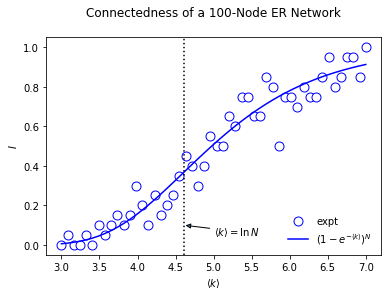

In [15]:
N = 100
trials = 20
ks = np.linspace(3,7)
Is = np.array([[nx.is_connected(er_fast(N, k/(N-1), 5056+t*trials+i))
                for i,k in enumerate(ks)] for t in range(trials)], bool)

plt.plot(ks, Is.mean(0), 'bo', mfc='w', ms=9, label='expt')
plt.plot(ks, (1-np.exp(-ks))**N, 'b-', label=r'$\left(1-e^{-\langle{k}\rangle}\right)^N$')
plt.title('Connectedness of a %d-Node ER Network\n' % N)
plt.xlabel(r'$\langle{k}\rangle$')
plt.ylabel('$I$')
plt.axvline(np.log(N), c='k', ls=':')
plt.annotate(r'$\langle{k}\rangle=\ln{\,N}$', (np.log(N),.1), (5,.05),
             arrowprops={'arrowstyle':'-|>'})
plt.legend(loc=4, frameon=False)
plt.show()

### 2.2.3. Small components

By definition, a component is a small component if it is not the giant component. If a small component contains $s$ nodes, it possesses at least ($s-1$) edges, which glue the nodes as a tree. Since the $s$ nodes can be joined with $\left( \matrix{s\\2} \right)$ possible edges, there are at most

\begin{align*}
    x\equiv\left( \matrix{s\\2} \right)- \left(s-1\right) = \dfrac{\left(s-1\right)\left(s-2\right)}{2}
\end{align*}

excess edges in a small component. By homogenity of random network, we expect that only $px = \dfrac{\langle{k\rangle}}{N}x\sim\dfrac{s^2}{N}$ excess edges are realized, so a small component has no excess edges as long as its size $s\ll\sqrt{N}$. (In fact, $s$ is expected to be a constant independent of $N$.) In other words, we expect that

**<p style="text-align: center">small components are trees.</p>**

Based on the expectation, Newman develops a series of involved arguments and calculates several characteristic quantities of an ER network's components. Here I will just list out his results; please consult his Chapter 12 for the derivation [3]. You may also read [Barabasi's Chapter 3](http://networksciencebook.com/chapter/3)for a more empirical discussion [4].

- **Size distribution of small components.**

\begin{align*}
    P_s = \dfrac{\big(s\langle{k}\rangle\big)^{s-1}}{s!} e^{-s\langle{k}\rangle}
  \approx s^{−3/2}e^{−\left(\langle{k}\rangle−1\right)s + \left(s−1\right)\ln{\langle{k}\rangle}}
\end{align*}


- **Average size of all small components.** Denote the giant component's fractional size with $S$. ($S=0$ if it does not exist.)

\begin{align*}
    \langle{s}\rangle = \dfrac{2}{2-\langle{k}\rangle+\langle{k}\rangle S}
\end{align*}


- **Expected size of the small component to which a peripheral node belongs.** This is the different from the last expression. If we randomly pick a node outside the giant component, we expect the node to belong to a small component with $\langle{s\rangle}^\prime$ nodes. Note that it diverges at $\langle{k}\rangle=1$.

\begin{align*}
    \langle{s\rangle}^\prime = \dfrac{1}{1-\langle{k}\rangle+\langle{k}\rangle S}
\end{align*}

---
# 3. Configuration Model

Instead of specifying its number of edges $E$ or connection probability $p$, we may alternatively specify a random network's degree distribution $P(k)$ or an explicit degree sequence $\left\{k\right\}=\left\{k_1,\cdots,k_N\right\}$. The two approaches respectively correspond to the generazlied random model and the configuration model.

- The generalized random model specifies a network's $P(k)$ through a generation function $g{\left(z\right)}$. This is a relatively abstract formulation, but it provides us some novel perspectives, which require more advanced mathematics, to analyse networks. Read Newman's Chapter 13 and [Albert and Barabási's Section V](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.74.47) if you feel interested [4,5].

\begin{align*}
    g(z) &= \sum_{k=0}^\infty P(k)z^k \\
    P(k) &= \dfrac{1}{k!} \frac{dg(z)}{dz}\Bigg| _{z=0}
\end{align*}
    
- The configuration model specifies a network's degree sequence $\left\{k\right\}$ instead. It is computationally simpler and thus more practical. You may regard the generalized random model as an extension of the configuration model that takes in a stochastic degree sequence.

The configuration model somewhat resembles Erdős and Rényi's original $G{\left(N,E\right)}$ model because they both fix the the number of edges. However, the configuration model can generate inhomogeneous networks that $G{\left(N,E\right)}$ cannot produce.

## 3.1. Algorithm

Given a degree sequence $\left\{k\right\}$, the configuration model creates a network in the following steps.

1. Place $k_i$ stubs, i.e. a "half-edge", at node $i$.
2. Randomly pick two stubs and join them as an edge.
3. Repeat step 2 until all stubs are paired up.

A degree sequence that can create a simple graph, i.e. a graph without multi-edges or self-loops, is called graphical. Obviously, $\sum_i k_i$ must be even for $\left\{k\right\}$ to be graphical, otherwise one stub will be left. There is another constraint for a graphical degree sequence given by the [Erdős-Gallai theorem](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93Gallai_theorem). 

In NetworkX, you can check a degree sequence's graphicality with `is_graphical()`. You can then use `configuration_model()` to turn a graphical sequence into a graph, which is by default a `MultiGraph`.

True False False


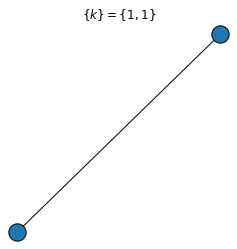

In [16]:
print(nx.is_graphical([1,1]), # True; as a 2-node line
      nx.is_graphical([1,2]), # False; one stub left
      nx.is_graphical([2,2])) # False; two multi-edges or two self-loops

plt.figure(figsize=(4,4))
plt.title(r'$\left\{k\right\}=\left\{1,1\right\}$')
nx.draw_circular(nx.configuration_model([1,1]), edgecolors='k')

However, the algorithm of `configuration_model()` may realize a graph with multi-edges or self-loops even the degree sequence is graphical. This can be undesired if we want a simple graph. To prevent such cases, step 2 of the algorithm above should be retracted if the resulting edge is a multi-edge or a self-loop. 

Unfortunately, you cannot modify NetworkX's code. Its [documentation](https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.degree_seq.configuration_model.html) suggests user manually removing a graph's multi-edges and self-loops. But this action inevitably distorts the original degree sequence.

In [17]:
G = nx.configuration_model([2]*6, seed=5056)
print('original edges:', G.edges)
G = nx.Graph(G)
print('after removing multi-edges:', G.edges)
G.remove_edges_from(nx.selfloop_edges(G))
print('after removing self-loops:', G.edges)

original edges: [(0, 0, 0), (1, 1, 0), (2, 3, 0), (2, 3, 1), (4, 4, 0), (5, 5, 0)]
after removing multi-edges: [(0, 0), (1, 1), (2, 3), (4, 4), (5, 5)]
after removing self-loops: [(2, 3)]


## 3.2. Properties

In the following experiments I will use the degree sequence of the Florentine families [6]. Each node represents a powerful family in Florence during Renaissance, and an edge between two nodes represents marriage between two families.

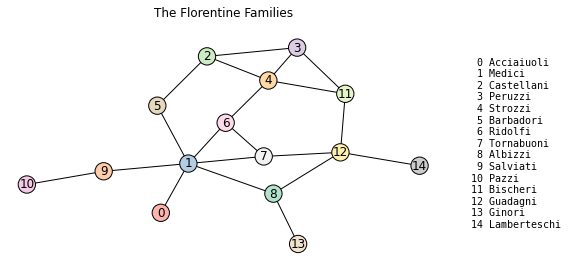

In [18]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap as LSC
cmap = LSC.from_list('', list(cm.Pastel1.colors)+list(cm.Pastel2.colors),
                     cm.Pastel1.N+cm.Pastel2.N) # 17 colours
del cm, LSC

florence = nx.convert_node_labels_to_integers(nx.florentine_families_graph(),
                                                label_attribute='family') # 15 nodes

plt.figure(figsize=(6,3))
nx.draw_kamada_kawai(florence, edgecolors='k', cmap=cmap,
                     node_color=[i for i in florence], with_labels=True)
plt.text(1.1, 0, '\n'.join(['%2d %s'%(i,f) for i,f in florence.nodes(data='family')]),
         family='monospace', va='center')
plt.title('The Florentine Families\n')

ks = np.array([k for n,k in florence.degree])

### 3.2.1. Edge probability

Consider a simple random network first. How likely are nodes $i$ and $j$ with degrees $k_i$ and $k_j$ connected?
We have mentioned this problem when we discussed modularity, and the answer is $p_{ij}=\dfrac{k_ik_j}{2E}$.

\begin{align*}
    p_{ij} &= P\left(i\text{ joins }j\right) \\
           &= 2\times P\begin{pmatrix}\text{Pick a stub }\\ \text{ from node }i \end{pmatrix}\times P\begin{pmatrix}\text{Pick a stub } \\ \text{ from node }j \end{pmatrix} \times \begin{pmatrix}\text{No. of edges available } \\ \text{ to connect them}\end{pmatrix} \\
           &= 2\times \frac{k_i}{2E}\times \frac{k_j}{2E-1}\times E\\
           &= \frac{k_ik_j}{2E-1} \approx \frac{k_ik_j}{2E}
\end{align*}
  

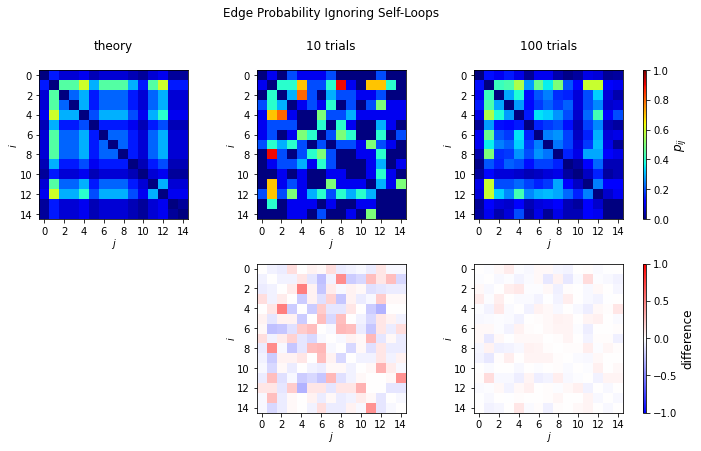

In [19]:
N = florence.number_of_nodes()
E = florence.number_of_edges()

t1,t2 = 10,100
pij_theory = ks.reshape(-1,1)@ks.reshape(1,-1)/(2*E)
pij_expt = lambda trials: sum(nx.to_numpy_array(nx.configuration_model(ks, seed=5056+t))
                              for t in range(trials))/trials
pij_expt1, pij_expt2 = pij_expt(t1), pij_expt(t2)
for pij in [pij_theory, pij_expt1, pij_expt2]: # ignore self-loops because
    np.fill_diagonal(pij, 0)                   # another formula governs them 

fig,ax = plt.subplots(2, 3, figsize=(12,6.3))
plt.subplots_adjust(hspace=.3)
fig.suptitle('Edge Probability Ignoring Self-Loops', y=1.02)
for row in ax:
    for col,pij in zip(row, [pij_theory, pij_expt1, pij_expt2]):
        if col.is_first_row():
            im = col.imshow(pij, cmap='jet', vmin=0, vmax=1)
        else:
            im = col.imshow(pij-pij_theory, cmap='bwr', vmin=-1, vmax=1)
        col.set_ylabel('$i$', labelpad=.25); col.set_yticks(range(0,N,2))
        col.set_xlabel('$j$', labelpad=.25); col.set_xticks(range(0,N,2))
    cb = fig.colorbar(im, ax=row, fraction=.05, pad=.03, aspect=50)
    cb.set_label('$p_{ij}$', fontsize=12)
cb.set_label('difference')
    
ax[0,0].set_title('theory\n')
ax[0,1].set_title('%d trials\n' % t1)
ax[0,2].set_title('%d trials\n' % t2)
ax[1,0].set_visible(False)
plt.show()

The formula of edge probability yields other useful quantities.

#### Probability of multi-edges

With a similar argument, we can calculate the probability of a second edge between $i$ and $j$:

\begin{align*}
       q_{ij}
    &= P\left(\text{two stub of }i\text{ joins two stubs of }j\right) \\
    &= \dfrac{k_ik_j}{2E} \times
      P\left[\text{one of }i\text{'s ($k_i-1$) free stubs joins one of }j\text{'s ($k_j-1$) free stubs}\right] \\
    &= \dfrac{k_ik_j}{2E} \times \dfrac{\left(k_i-1\right)\left(k_j-1\right)}{2E} =
       \dfrac{k_ik_j\left(k_i-1\right)\left(k_j-1\right)}{\left(2E\right)^2}\,.
\end{align*}

In general, the probability of the $n$th multi-edge involves $E^{-n}$, which is exponentially small. Hence we can ignore cases that $i$ and $j$ has more than two multi-edges and simply expect $m = \dfrac{1}{2}\sum_{i,j}{q_{ij}}$ multi-edges in total. As $2E=N\langle{k\rangle}$,

\begin{align*}
       m
    &= \dfrac{1}{2}\sum_{i,j}{\dfrac{k_ik_j\left(k_i-1\right)\left(k_j-1\right)}{\left(2E\right)^2}} \\
    &= \dfrac{1}{2\langle{k}\rangle^2} \sum_i{\dfrac{k_i\left(k_i-1\right)}{N}} \sum_j{\dfrac{k_j\left(k_j-1\right)}{N}} \\
    &= \dfrac{1}{2} \left(\dfrac{\langle{k^2}\rangle-\langle{k}\rangle}{\langle{k}\rangle}\right)^2\,,
\end{align*}

which is a constant independent of $N$. Therefore multi-edges' contribution to a node's degree vanishes as $\dfrac{1}{N}$, so does the distortion to $\left\{k\right\}$ due to removing multi-edges. (By the way, the ratio $\dfrac{\langle{k^2}\rangle-\langle{k}\rangle}{\langle{k}\rangle}$ will appear frequently in our comming discussion, and its nominator in fact represents the expected total degree of a node's neighbours.)

In [20]:
ratio = ((ks**2).mean()-ks.mean())/ks.mean()
m_theory = ratio**2/2
def m_expt(trials):
    m = []
    for t in range(trials):
        G = nx.configuration_model(ks, seed=5056+t)
        m.append(sum(len(G[u][v]) for u,v in nx.Graph(G).edges if len(G[u][v])>1))
    return sum(m)/trials
m_theory, m_expt(t1), m_expt(t2)

(2.7612500000000013, 3.0, 2.48)

#### Probability of self-loops

The $k_i$ stubs of node $i$ can form $\left(\matrix{k_i \\ 2}\right)=\dfrac{1}{2}k_i\left(k_i-1\right)$ possible pairs. Since each pair of stubs joins with a probability $\dfrac{1}{2E}$, the probability for $i$ to have self-loops multiplies the two factors and amounts to $p_{ii} = \dfrac{k_i\left(k_i-1\right)}{4E}$. Since the probability of having more the ($n+1$)th-self loop scales with $E^{-n}$ and gets insignificant quickly, summing $p_{ii}$ over all nodes gives the expected number of self loops

\begin{align*}
    \ell = \sum_i {\dfrac{k_i\left(k_i-1\right)}{4E}}
         = \dfrac{1}{2} \dfrac{\langle{k^2}\rangle-{\langle{k}\rangle}}{\langle{k}\rangle}\,.
\end{align*}

Because it is independent of $N$, the contribution to $\left\{k\right\}$ due to self-loops also vanishes as $\dfrac{1}{N}$.

In [21]:
l_theory = ratio/2
l_expt = lambda trials: sum(len(list(nx.selfloop_edges(nx.configuration_model(ks, seed=5056+t))))
                            for t in range(trials))/trials
l_theory, l_expt(t1), l_expt(t2)

(1.1750000000000003, 1.0, 1.4)

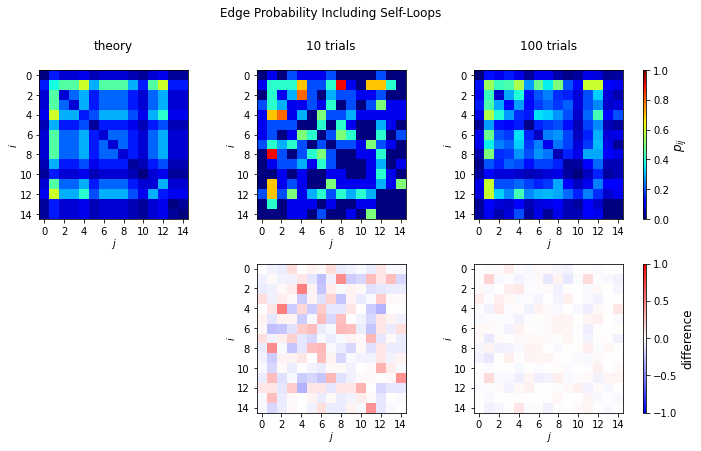

In [22]:
pij_expt1, pij_expt2 = pij_expt(t1), pij_expt(t2)
np.fill_diagonal(pij_theory, ks*(ks-1)/(4*E))

fig,ax = plt.subplots(2, 3, figsize=(12,6.3))
plt.subplots_adjust(hspace=.3)
fig.suptitle('Edge Probability Including Self-Loops', y=1.02)
for row in ax:
    for col,pij in zip(row, [pij_theory, pij_expt1, pij_expt2]):
        if col.is_first_row():
            im = col.imshow(pij, cmap='jet', vmin=0, vmax=1)
        else:
            im = col.imshow(pij-pij_theory, cmap='bwr', vmin=-1, vmax=1)
        col.set_ylabel('$i$', labelpad=.25); col.set_yticks(range(0,N,2))
        col.set_xlabel('$j$', labelpad=.25); col.set_xticks(range(0,N,2))
    cb = fig.colorbar(im, ax=row, fraction=.05, pad=.03, aspect=50)
    cb.set_label('$p_{ij}$', fontsize=12)
cb.set_label('difference')
    
ax[0,0].set_title('theory\n')
ax[0,1].set_title('%d trials\n' % t1)
ax[0,2].set_title('%d trials\n' % t2)
ax[1,0].set_visible(False)
plt.show()

#### Number of common neighbours

Nodes $i$ and $j$ share a neighbour $h$ if $h$ has an edge to both $i$ and $j$.

\begin{align*}
    n_{ij} &= \sum_{h} {\dfrac{k_ik_h}{2E} \dfrac{k_j\left(k_h-1\right)}{2E}} \\
           &= \dfrac{k_ik_j}{2E} \sum_{h} {\dfrac{k_h\left(k_h-1\right)}{2E}} \\
           &= p_{ij} \dfrac{\langle{k^2}\rangle-{\langle{k}\rangle}}{\langle{k}\rangle}
\end{align*}

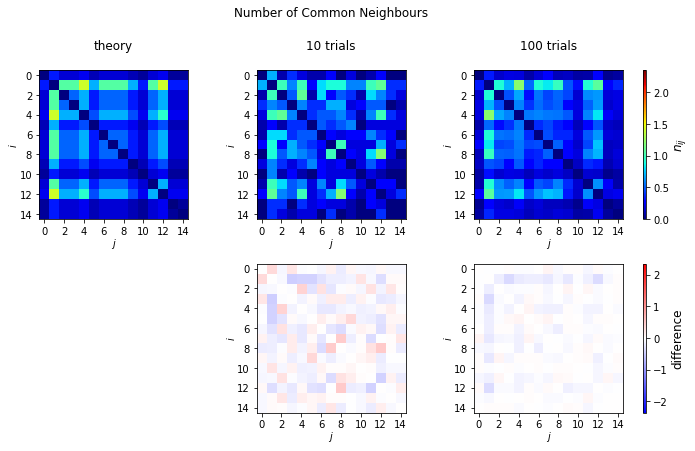

In [23]:
nij_theory = pij_theory*ratio
def nij_expt(trials):
    nij = np.zeros((len(ks), len(ks)), float)
    for t in range(trials):
        A = nx.to_numpy_array(nx.configuration_model(ks, seed=5056+t))
        nij += A@A
    return nij/trials
nij_expt1, nij_expt2 = nij_expt(t1), nij_expt(t2)
for nij in [nij_theory, nij_expt1, nij_expt2]:
    np.fill_diagonal(nij, 0)

fig,ax = plt.subplots(2, 3, figsize=(12,6.3))
plt.subplots_adjust(hspace=.3)
fig.suptitle('Number of Common Neighbours', y=1.02)
for row in ax:
    for col,nij in zip(row, [nij_theory, nij_expt1, nij_expt2]):
        if col.is_first_row():
            im = col.imshow(nij, cmap='jet', vmin=0, vmax=ratio)
        else:
            im = col.imshow(nij-nij_theory, cmap='bwr', vmin=-ratio, vmax=ratio)
        col.set_ylabel('$i$', labelpad=.25); col.set_yticks(range(0,N,2))
        col.set_xlabel('$j$', labelpad=.25); col.set_xticks(range(0,N,2))
    cb = fig.colorbar(im, ax=row, fraction=.05, pad=.03, aspect=50)
    cb.set_label('$n_{ij}$', fontsize=12)
cb.set_label('difference')
    
ax[0,0].set_title('theory\n')
ax[0,1].set_title('%d trials\n' % t1)
ax[0,2].set_title('%d trials\n' % t2)
ax[1,0].set_visible(False)
plt.show()

### 3.2.2. Clustering coefficient

To derive the configuration model's clustering coefficient, we need to know how likely a node's edge links the node to a $k$-degree node. Since the edge links to a specific $k$-degree node with a probability $\dfrac{k}{2E}$, the required probability reads $\dfrac{k}{2E}{NP(k)} = \dfrac{kP(k)}{\langle{k}\rangle}$, where $P(k)$ is the degree distribution and $NP(k)$ thus the total number of $k$-degree nodes. We define the **excess degree distribution**:

\begin{align*}
Q(k)\equiv\dfrac{\left(k+1\right)P(k+1)}{\langle{k}\rangle} = \dfrac{\left(k+1\right)P(k+1)}{\sum_{k=0} (k+1)P(k+1)}
\end{align*}

which after all measures how likely a node has a ($k+1$)-degree neighbour, is often a handier quantity.

Now consider a case that three nodes $h$, $i$, and $j$ try to form a triplet. Since two of them, say $i$ and $j$, must spend one stub for each other, the remaining node, i.e. $h$, can only be connected with them respectively via $\left(k_i-1\right)$ and $\left(k_j-1\right)$ stubs. On the other hand, the two nodes $i$ and $j$ must reserve one stub each for $h$, so the probability for $i$ and $j$ to be connected in fact reduces to $\dfrac{\left(k_i-1\right)\left(k_j-1\right)}{2E}$. These arguments combine to mean that the configuration model's clustering coefficient on average reads

\begin{align*}
    C &= \sum_{k_i,k_j=1}^\infty {Q(k_i-1)Q(k_j-1)\dfrac{\left(k_i-1\right)\left(k_j-1\right)}{2E}} \\
      &= \dfrac{1}{2E} \sum_{k_i,k_j=1}^\infty {Q(k_i-1)Q(k_j-1)\cdot \left(k_i-1\right)\left(k_j-1\right)} \\
      &= \dfrac{1}{2E} \left[\sum_{k=1}^\infty {\left(k-1\right)Q(k-1)}\right]^2
       = \dfrac{1}{2E\langle{k}\rangle^2} \left[\sum_{k=1}^\infty {\left(k-1\right)kP(k)}\right]^2 \\
      &= \dfrac{1}{N\langle{k}\rangle^3} \Big(\langle{k^2}\rangle-\langle{k}\rangle\Big)^2
       = \dfrac{1}{N\langle{k}\rangle} \left(\dfrac{\langle{k^2}\rangle-{\langle{k}\rangle}}{\langle{k}\rangle}\right)^2\,.
\end{align*}

In [24]:
C_theory = ratio**2/(N*ks.mean())
C_expt = lambda trials: sum(nx.average_clustering(nx.configuration_model(ks, nx.Graph, 5056+t))
                            for t in range(trials))/trials
C_theory, C_expt(10), C_expt(100)

(0.13806250000000006, 0.09533333333333335, 0.08995555555555548)

### 3.2.3. Degree-preserving randomization

Since we often borrow degree sequences from real networks, degree-preserving randomization is a handy alternative to execute the configuration model. With degree-preserving randomization, we choose two arbitrary edges $\left(u,v\right)$ and $\left(x,y\right)$ and swap their ends so that they become $\left(u,x\right)$ and $\left(v,y\right)$. Obviously, no nodes' degrees change after a swap. If the swap results in multi-edges or self-loops, the swap is discarded.

You may carry out this procedure with `double_edge_swap()`, while `connected_double_edge_swap()` ensures the connectedness of the randomized network. Beware that the methods modify a network in-place, so save the original edges' information in advance if you need to reuse them. More importantly, degree-preserving randomization nullifies the statistics derived above, but the distortion vanishes as $N$ grows.

Old degree sequence: [1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1]
New degree sequence: [1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1]


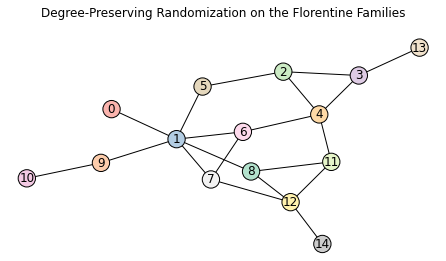

In [25]:
print('Old degree sequence:', [k for n,k in florence.degree])
nx.double_edge_swap(florence, seed=5056)

plt.figure(figsize=(6,3))
nx.draw_kamada_kawai(florence, edgecolors='k', cmap=cmap,
                     node_color=[i for i in florence], with_labels=True)
plt.title('Degree-Preserving Randomization on the Florentine Families\n')

print('New degree sequence:', [k for n,k in florence.degree])

# References

1. Erdős P., Rényi A.: On Random Graphs. I, Publ. Math. Debrecen 6, 290–297 (1958).
2. Gilbert E. N.: Random Graphs, Ann. Math. Stat. 30(4), 1141–1144 (1959).
3. Newman, M. E. J.: Networks: An Introduction. Oxford University Press, Oxford (2010).
4. Barabási, A.-L.: Network Science. Cambridge University Press, Cambridge (2016).
5. Albert R., Barabási A.-L.: Statistical mechanics of complex networks, Rev. Mod. Phys. 74(1), 47–97 (2002).
6. Breiger R. L., Pattison P. E.: Cumulated social roles: The duality of persons and their algebras, Soc. Netw. 8(3), 215–256, (1986).